In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### **ML From here:**

In [ ]:
df = pd.read_csv('./MinMax_Scaled_Heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,1.000000,0.55,0.437811,0.0,0.5,0.507042,0.0,0.431818,0.5,1
914,0.816327,1.0,0.000000,0.72,0.320066,1.0,0.5,0.570423,0.0,0.681818,0.5,1
915,0.591837,1.0,0.000000,0.65,0.217247,0.0,0.5,0.387324,1.0,0.431818,0.5,1
916,0.591837,0.0,0.333333,0.65,0.391376,0.0,0.0,0.802817,0.0,0.295455,0.5,1


In [ ]:
pd.DataFrame(df).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,0.520630,0.192502,0.0,0.387755,0.530612,0.653061,1.0
Sex,918.0,0.789760,0.407701,0.0,1.000000,1.000000,1.000000,1.0
ChestPainType,918.0,0.260349,0.318840,0.0,0.000000,0.000000,0.666667,1.0
RestingBP,918.0,0.661983,0.092571,0.0,0.600000,0.650000,0.700000,1.0
Cholesterol,918.0,0.329684,0.181400,0.0,0.287313,0.369818,0.442786,1.0
FastingBS,918.0,0.233115,0.423046,0.0,0.000000,0.000000,0.000000,1.0
RestingECG,918.0,0.494553,0.315836,0.0,0.500000,0.500000,0.500000,1.0
MaxHR,918.0,0.540911,0.179298,0.0,0.422535,0.549296,0.676056,1.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.000000,0.000000,1.000000,1.0
Oldpeak,918.0,0.396291,0.121201,0.0,0.295455,0.363636,0.465909,1.0


In [ ]:
y=df.iloc[:,-1].values
df.drop(df.columns[-1], axis=1, inplace=True)
X = df.iloc[:,:].values
X_with_column = df.iloc[:,:]
X.shape

(918, 11)

Spliting the training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=101)
X_train.shape

(734, 11)

# Checking all the classifiers with default settings

In [ ]:
from sklearn.ensemble import (
    HistGradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
    SGDClassifier,
    RidgeClassifier,
    PassiveAggressiveClassifier,
)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import (
    KNeighborsClassifier,
    RadiusNeighborsClassifier,
    NearestCentroid,
)
from sklearn.naive_bayes import (
    BernoulliNB,
    CategoricalNB,
    ComplementNB,
    GaussianNB,
    MultinomialNB,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


def create_and_fit_classifiers(X_train, y_train):
    classifiers = {
        "Logistic Regression Classifier": LogisticRegression(),
        # "Linear Regression Classifier": LinearRegression(),
        # "Stochastic Gradient Descent": SGDClassifier(),
        # "Ridge Classifier": RidgeClassifier(),
        # "Passive Aggressive Classifier": PassiveAggressiveClassifier(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "K-Nearest Neighbor Classifier": KNeighborsClassifier(),
        # "Radius Neighbor Classifier": RadiusNeighborsClassifier(),
        # "Nearest Centroid Classifier": NearestCentroid(),
        "Random Forest Classifier": RandomForestClassifier(),
        "AdaBoost Classifier": AdaBoostClassifier(),
        "Gradient Boosting Classifier": GradientBoostingClassifier(),
        "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier(),
        "Bagging Classifier": BaggingClassifier(),
        # "Extra Trees Classifier": ExtraTreesClassifier(),
        # "Gaussian Naive Bayes Classifier": GaussianNB(),
        "Bernoulli Naive Bayes Classifier": BernoulliNB(),
        # "Categorical Naive Bayes Classifier": CategoricalNB(),
        # "Complement Naive Bayes Classifier": ComplementNB(),
        # "Multinomial Naive Bayes Classifier": MultinomialNB(),
        # "Support Vector Classifier": SVC(),
        # "Linear Support Vector Classifier": LinearSVC(),
        "Multi-layer Perceptron classifier": MLPClassifier(),
        "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
        "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
        # "Gaussian Process Classifier": GaussianProcessClassifier(),
        # "Kernel Ridge Classifier": KernelRidge(),
        "Dummy Classifier": DummyClassifier(),
        "LightGBM Classifier": LGBMClassifier(force_col_wise=True),
        "Extreme Gradient Boosting Classifier": XGBClassifier(),
        "Cat Boost Classifier": CatBoostClassifier(),
    }

    fitted_classifiers = {}

    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        fitted_classifiers[name] = classifier

    return fitted_classifiers


models = create_and_fit_classifiers(X_train, y_train)

# The metrics

In [31]:
# @title
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score, # eije roc ta count kortese sklearn thke
    cohen_kappa_score,
    matthews_corrcoef,
    log_loss,
    average_precision_score,
    jaccard_score,
    balanced_accuracy_score,
)


def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)


def geometric_mean_score(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return np.sqrt(sensitivity * specificity)


def index_balanced_accuracy(y_true, y_pred, alpha=0.1):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return (1 + alpha * (sensitivity + specificity)) * (sensitivity * specificity)


def calculate_metrics(y_true, y_pred, y_pred_proba):
    cm = confusion_matrix(y_true, y_pred)

    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_pred_proba),
        "Kappa": cohen_kappa_score(y_true, y_pred),
        "MCC": matthews_corrcoef(y_true, y_pred),
        # "Log Loss": log_loss(y_true, y_pred_proba),
        # "Average Precision": average_precision_score(y_true, y_pred_proba),
        # "Jaccard": jaccard_score(y_true, y_pred),
        # "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
        # "Specificity": specificity_score(y_true, y_pred),
        # "Geometric Mean": geometric_mean_score(y_true, y_pred),
        # "IBA": index_balanced_accuracy(y_true, y_pred),
        # "TP": cm[1][1],
        # "TN": cm[0][0],
        # "FP": cm[1][0],
        # "FN (Type-2)": cm[0][1],
    }
    return metrics


def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]  # Assuming binary classification

    stratified_cv = StratifiedKFold(n_splits=10)
    acc = cross_val_score(model, X, y, scoring='accuracy', cv=stratified_cv)
    f1 = cross_val_score(model, X, y, scoring='f1_macro', cv=stratified_cv)
    recall = cross_val_score(model, X, y, scoring='recall', cv=stratified_cv)
    precision = cross_val_score(model, X, y, scoring='precision', cv=stratified_cv)
    roc = cross_val_score(model, X, y, scoring='roc_auc', cv=stratified_cv)

    metrics = calculate_metrics(y, y_pred, y_pred_proba)
    metrics["Mean acc (10)"] = acc.mean() * 100
    metrics["Std acc (10)"] = acc.std() * 100
    metrics["Mean f1 (10)"] = f1.mean() * 100
    metrics["Std f1 (10)"] = f1.std() * 100
    metrics["Mean recall (10)"] = recall.mean() * 100
    metrics["Std recall (10)"] = recall.std() * 100
    metrics["Mean precision (10)"] = precision.mean() * 100
    metrics["Std precision (10)"] = precision.std() * 100
    metrics["Mean roc (10)"] = roc.mean() * 100
    metrics["Std roc (10)"] = roc.std() * 100

    return metrics


def evaluate_models(models, X, y, dataset_name="Dataset"):
    results = []

    for model_name, model in models.items():
        metrics = evaluate_model(model, X, y)
        # Reorder to place Model and Dataset first
        ordered_metrics = {"Model": model_name, "Dataset": dataset_name, **metrics}
        results.append(ordered_metrics)

    return pd.DataFrame(results)

In [32]:
test_results_df = evaluate_models(models, X_test, y_test, dataset_name="Test Set")
# sorted_df = test_results_df.sort_values(by=['Accuracy', 'FN (Type-2)'], ascending=[False, False]).reset_index(drop=True)
sorted_df = test_results_df.sort_values(by=['Mean acc (10)'], ascending=[False]).reset_index(drop=True)
sorted_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6722802	total: 4.49ms	remaining: 893ms
5:	learn: 0.6681946	total: 5.27ms	remaining: 873ms
6:	learn: 0.6643146	total: 6.48ms	remaining: 920ms
7:	learn: 0.6608494	total: 7.19ms	remaining: 891ms
8:	learn: 0.6564679	total: 8.23ms	remaining: 906ms
9:	learn: 0.6524932	total: 9.18ms	remaining: 909ms
10:	learn: 0.6483767	total: 10.2ms	remaining: 913ms
11:	learn: 0.6438130	total: 11ms	remaining: 908ms
12:	learn: 0.6406091	total: 11.9ms	remaining: 904ms
13:	learn: 0.6374560	total: 12.8ms	remaining: 903ms
14:	learn: 0.6336476	total: 13.8ms	remaining: 909ms
15:	learn: 0.6300430	total: 14.7ms	remaining: 904ms
16:	learn: 0.6266083	total: 15.6ms	remaining: 900ms
17:	learn: 0.6228018	total: 16.4ms	remaining: 894ms
18:	learn: 0.6195562	total: 17.3ms	remaining: 893ms
19:	learn: 0.6164136	total: 18.2ms	remaining: 891ms
20:	learn: 0.6128485	total: 19ms	remaining: 886ms
21:	learn: 0.6093778	total: 20.5ms	remaining: 912ms
22:	learn: 0.6052460	to

,Model,Dataset,Accuracy,Precision,Recall,F1 Score,AUC,Kappa,MCC,Mean acc (10),Std acc (10),Mean f1 (10),Std f1 (10),Mean recall (10),Std recall (10),Mean precision (10),Std precision (10),Mean roc (10),Std roc (10)
0,Cat Boost Classifier,Test Set,0.907609,0.929293,0.901961,0.915423,0.953372,0.813676,0.814117,86.432749,6.616462,85.904468,7.151692,90.363636,9.475501,87.178211,8.845663,91.969697,6.467297
1,Multi-layer Perceptron classifier,Test Set,0.869565,0.906250,0.852941,0.878788,0.940579,0.737892,0.739481,85.935673,7.717803,85.175693,8.412985,85.545455,13.031748,87.261544,10.253613,90.590909,7.292625
2,Logistic Regression Classifier,Test Set,0.858696,0.880000,0.862745,0.871287,0.926710,0.714695,0.714867,85.380117,8.807918,85.130711,8.872363,85.363636,12.723701,88.396853,9.007030,90.306818,6.989416
3,K-Nearest Neighbor Classifier,Test Set,0.864130,0.881188,0.872549,0.876847,0.917085,0.725340,0.725384,84.327485,9.520856,83.691450,10.278979,87.454545,10.490452,86.171717,11.315156,89.591540,8.528310
4,Linear Discriminant Analysis,Test Set,0.847826,0.877551,0.843137,0.860000,0.924319,0.693479,0.694145,84.298246,6.084471,84.077254,6.099578,83.545455,11.314074,88.381702,7.546210,90.074495,6.788679
5,Random Forest Classifier,Test Set,0.896739,0.910891,0.901961,0.906404,0.952535,0.791259,0.791306,84.269006,6.138680,86.066285,6.740662,88.363636,10.355659,86.411616,8.575547,92.203914,6.124592
6,Quadratic Discriminant Analysis,Test Set,0.836957,0.852941,0.852941,0.852941,0.920851,0.670014,0.670014,84.269006,7.694893,83.838835,7.770729,88.363636,12.134235,84.790793,8.493758,91.055556,5.998546
7,Hist Gradient Boosting Classifier,Test Set,0.875000,0.891089,0.882353,0.886700,0.940937,0.747313,0.747358,83.801170,7.540459,83.308602,7.792314,86.363636,10.802510,85.773504,9.094579,89.162879,6.206519
8,LightGBM Classifier,Test Set,0.891304,0.918367,0.882353,0.900000,0.950263,0.781057,0.781807,83.771930,8.356897,83.045188,8.915328,87.363636,13.891254,85.642802,10.110815,89.450758,7.206706
9,Extreme Gradient Boosting Classifier,Test Set,0.869565,0.906250,0.852941,0.878788,0.937231,0.737892,0.739481,83.216374,7.388120,82.643730,7.942871,86.454545,9.693228,85.218531,9.972581,88.352273,5.955762


In [33]:
sorted_df.to_csv('BenchmarkResults.csv')

# Working with the best classifier out of these

In [34]:
best_model = models[sorted_df['Model'][0]]

In [35]:
import plotly.figure_factory as ff
import pandas as pd
from sklearn.metrics import classification_report

def plot_classification_report(model, X, y):
    y_pred = model.predict(X)
    report = classification_report(y, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Ensure the data is in the correct format for the heatmap
    z = report_df.iloc[:-1, :-1].values
    x = report_df.columns[:-1].tolist()
    y = report_df.index[:-1].tolist()

    fig = ff.create_annotated_heatmap(
        z=z,
        x=x,
        y=y,
        colorscale='Blues',
        annotation_text=z.round(2),
        hoverinfo="z"
    )

    # Update layout
    fig.update_layout(
        title='Classification Report',
        xaxis_title='Metrics',
        yaxis_title='Classes',
        width=800,
        height=600,
        template='plotly_white',
    )

    # Show the plot
    fig.show()

# Example usage:
plot_classification_report(best_model, X, y)


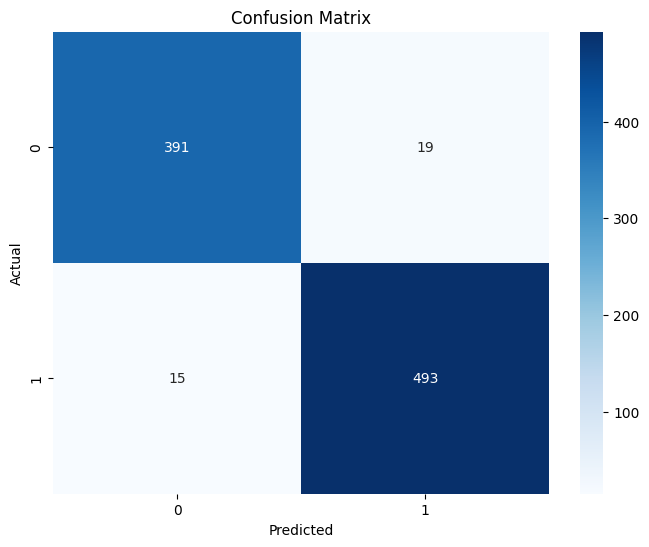

In [36]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=np.unique(y),
        yticklabels=np.unique(y),
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


plot_confusion_matrix(best_model, X, y)

In [37]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Create ROC curve trace
    roc_trace = go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        line=dict(color="darkorange", width=2),
        name=f"ROC curve (AUC = {roc_auc:.2f})",
    )

    # Create diagonal line trace
    diagonal_trace = go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        line=dict(color="navy", width=2, dash="dash"),
        showlegend=False,
    )

    # Create layout
    layout = go.Layout(
        title="Receiver Operating Characteristic (ROC) Curve",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        width=800,
        height=600,
        legend=dict(x=0.8, y=0.1, traceorder="normal"),
        margin=dict(l=50, r=50, t=80, b=50),
        template="plotly_white",
    )

    # Create figure
    fig = go.Figure(data=[roc_trace, diagonal_trace], layout=layout)

    # Show the plot
    fig.show()


# Example usage:
plot_roc_curve(best_model, X, y)

In [38]:
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pred_proba)
    average_precision = average_precision_score(y, y_pred_proba)

    # Create figure
    fig = go.Figure()

    # Plot precision-recall curve
    fig.add_trace(go.Scatter(
        x=recall,
        y=precision,
        mode='lines',
        name=f'AP = {average_precision:.2f}',
        line=dict(color='blue', width=2),
        hovertemplate='Recall: %{x:.2f}<br>Precision: %{y:.2f}<extra></extra>'
    ))

    # Update layout
    fig.update_layout(
        title='Precision-Recall Curve',
        xaxis_title='Recall',
        yaxis_title='Precision',
        width=800,
        height=600,
        template='plotly_white',
        legend=dict(x=0.7, y=0.1, traceorder='normal')
    )

    # Show the plot
    fig.show()

# Example usage:
plot_precision_recall_curve(best_model, X, y)


In [39]:
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import learning_curve


def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Create figure
    fig = go.Figure()

    # Plot training scores
    fig.add_trace(
        go.Scatter(
            x=train_sizes,
            y=train_scores_mean,
            mode="lines+markers",
            name="Training score",
            line=dict(color="red", width=2),
            error_y=dict(
                type="data",
                array=train_scores_std,
                visible=True,
                color="rgba(255, 0, 0, 0.3)",
            ),
        )
    )

    # Plot cross-validation scores
    fig.add_trace(
        go.Scatter(
            x=train_sizes,
            y=test_scores_mean,
            mode="lines+markers",
            name="Cross-validation score",
            line=dict(color="green", width=2),
            error_y=dict(
                type="data",
                array=test_scores_std,
                visible=True,
                color="rgba(0, 128, 0, 0.3)",
            ),
        )
    )

    # Update layout
    fig.update_layout(
        title="Learning Curve",
        xaxis_title="Training Examples",
        yaxis_title="Score",
        width=800,
        height=600,
        template="plotly_white",
        legend=dict(x=0.7, y=0.1, traceorder="normal"),
    )

    # Show the plot
    fig.show()


# Example usage:
plot_learning_curve(best_model, X, y)

In [40]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

def plot_feature_importance(model, X):
    feature_importances = model.feature_importances_
    features = X.columns

    feature_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
    feature_df = feature_df.sort_values(by="Importance", ascending=False)

    # Create horizontal bar chart
    fig = go.Figure()

    fig.add_trace(
        go.Bar(
            x=feature_df["Importance"],
            y=feature_df["Feature"],
            orientation='h',
            marker=dict(color=feature_df["Importance"], colorscale='Blues', cmin=0, cmax=max(feature_importances)),
            hovertemplate='Importance: %{x:.2f}',
        )
    )

    # Update layout
    fig.update_layout(
        title="Feature Importance",
        xaxis_title="Importance",
        yaxis_title="Feature",
        width=800,
        height=600,
        template='plotly_white',
    )

    # Show the plot
    fig.show()

# Example usage:
plot_feature_importance(best_model, X_with_column)


In [41]:
import plotly.graph_objects as go
from sklearn.calibration import calibration_curve


def plot_calibration_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    prob_true, prob_pred = calibration_curve(y, y_pred_proba, n_bins=10)

    # Create figure
    fig = go.Figure()

    # Plot calibration curve
    fig.add_trace(
        go.Scatter(
            x=prob_pred,
            y=prob_true,
            mode="markers+lines",
            name="Calibration Curve",
            line=dict(color="blue", width=2),
            marker=dict(size=8),
            hovertemplate="Predicted: %{x:.2f}<br>Actual: %{y:.2f}<extra></extra>",
        )
    )

    # Plot ideal line
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[0, 1],
            mode="lines",
            name="Ideal",
            line=dict(color="black", width=2, dash="dash"),
            hoverinfo="skip",
        )
    )

    # Update layout
    fig.update_layout(
        title="Calibration Curve",
        xaxis_title="Mean Predicted Probability",
        yaxis_title="Fraction of Positives",
        width=800,
        height=600,
        template="plotly_white",
        legend=dict(x=0.7, y=0.1, traceorder="normal"),
    )

    # Show the plot
    fig.show()


# Example usage:
plot_calibration_curve(best_model, X, y)

In [42]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Create the figure
    fig = go.Figure()

    # Add the ROC curve
    fig.add_trace(
        go.Scatter(
            x=fpr,
            y=tpr,
            mode="lines",
            name=f"ROC curve (AUC = {roc_auc:.2f})",
            line=dict(color="darkorange", width=2),
        )
    )

    # Add the diagonal line
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[0, 1],
            mode="lines",
            name="Chance",
            line=dict(color="navy", dash="dash"),
        )
    )

    # Add an annotation for the 50% point
    fig.add_trace(
        go.Scatter(
            x=[0.5],
            y=[0.5],
            mode="markers+text",
            name="50% Point",
            text=["50% Point"],
            textposition="top center",
            marker=dict(color="red", size=10, symbol="x"),
        )
    )

    # Update layout
    fig.update_layout(
        title="Receiver Operating Characteristic (ROC) Curve",
        title_font_size=16,
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        width=800,
        height=600,
        template="plotly_white",
        legend=dict(
            x=0.7,
            y=0.1,
            bgcolor="rgba(255, 255, 255, 0.5)",
            bordercolor="black",
            borderwidth=1,
        ),
    )

    # Add AUC annotation
    fig.add_annotation(
        x=0.6,
        y=0.2,
        text=f"AUC = {roc_auc:.2f}",
        showarrow=False,
        font=dict(size=14, color="darkorange"),
    )

    # Show the plot
    fig.show()


# Example usage:
plot_roc_curve(best_model, X_test, y_test)